# 실습 1

신용카드 신청자들에 대해서 해당 신청의 승인 여부를 기록한 두 데이터를 merge한 후 전처리하고자 합니다.
- 신청 관련 데이터: application_record.csv.zip / 신용 관련 데이터: credit_record.csv.zip
- 출처: Kaggle, https://www.Kaggle.com/datasets/rikdifos/credit-card-approval-prediction

 - ID 컬럼 기준으로 merge
 - 결측치 Imputing: 범주형 변수의 nan 값은 others로 변경
 - STATUS 컬럼의 C와 X를 각각 6과 7로 변경
 - 수치형 변수들에 대해 Scaling
 - 전체 데이터 Train, Test로 8:2로 파티셔닝

In [1]:
!unzip application_record.csv.zip
!unzip credit_record.csv.zip

Archive:  application_record.csv.zip
  inflating: application_record.csv  
Archive:  credit_record.csv.zip
  inflating: credit_record.csv       


In [2]:
import pandas as pd
import numpy as np
app_df = pd.read_csv('data/application_record.csv')
app_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
credit_df = pd.read_csv('data/credit_record.csv')
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
df = app_df.merge(credit_df, how='inner', on=['ID'])
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


In [6]:
# 결측치 체크
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [7]:
# filling null data
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')   #결측치는 others로 치환

In [8]:
# C, X에 대한 값 변환
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [10]:
for col in df.columns :
    print ( df[col].name, df[col].dtype)

numCol  = [col for col in df.columns if  df[col].dtype != "O"]
print(numCol)
catCol = [i for i in df.columns if  df[i].dtype == "O"]
print (catCol)

ID int64
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
DAYS_BIRTH int64
DAYS_EMPLOYED int64
FLAG_MOBIL int64
FLAG_WORK_PHONE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
MONTHS_BALANCE int64
STATUS int64
['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']
['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [10]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform( df[ numCol])

array([[-1.67300453, -0.57402555,  2.35150158, ..., -0.23015454,
         1.37574846,  0.68894579],
       [-1.67300453, -0.57402555,  2.35150158, ..., -0.23015454,
         1.30473682,  0.68894579],
       [-1.67300453, -0.57402555,  2.35150158, ..., -0.23015454,
         1.23372519,  0.68894579],
       ...,
       [ 1.71259619, -0.57402555, -0.74820919, ..., -1.33222969,
         0.59462045, -0.93694187],
       [ 1.71259619, -0.57402555, -0.74820919, ..., -1.33222969,
         0.52360882, -1.26211941],
       [ 1.71259619, -0.57402555, -0.74820919, ..., -1.33222969,
         0.45259718, -1.26211941]])

In [11]:
from sklearn.model_selection import train_test_split
train_test_split(df, test_size=0.2)

[             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
 271729  5053487           F            N               Y             0   
 118369  5028573           F            N               Y             0   
 421174  5088929           F            Y               Y             0   
 178887  5037262           F            N               Y             0   
 730692  5145719           F            N               Y             0   
 ...         ...         ...          ...             ...           ...   
 581595  5113994           F            N               N             2   
 157014  5036145           M            N               Y             0   
 197586  5041740           M            N               Y             1   
 99963   5024726           M            N               Y             0   
 764362  5149981           F            N               Y             1   
 
         AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
 271729         

In [ ]:
import seaborn as sns
sns.heatmap( df.corr())
#sns.pairplot(data=df )

#실습 2
mortdefault2009.csv는 2009년 모기지론과 관련한 데이터입니다.
Feature의 수는 5개입니다. default 변수의 경우, default 변수는 정상0, default 발생 1의 값을 갖고 있습니다.

주어진 데이터를 활용하여, creditScore에 대한 Regression을 적용해보세요.
1.	데이터 읽기
2.	Missing 확인 및 처리, @@@ 또는 qqq 등 이상한 값 제거
3.	Training과 Testing으로 8:2로 파티셔닝 / Data Scaling은 필요 시 수행
4.  default가 1인 값들만 남기기
5.	"creditScore"는 Y로,"houseAge","yearsEmploy"를 X변수로 하는 regression을 수행, Testing 셋에 대한 rmse를 계산


In [ ]:
!unzip mortDefault.zip

In [39]:
df = pd.read_csv("mortDefault.csv")
df.default.value_counts() / df.shape[0]
df.drop( "year", axis=1, inplace=True)
data1 = df[ df.default == 1 ]
data1.drop( "default", axis=1, inplace=True)
data1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-acdac060d8a3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mortDefault.csv")
<ipython-input-39-acdac060d8a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop( "default", axis=1, inplace=True)


(24741, 4)

In [40]:
data1.replace({"@@@":np.nan,"qqq":np.nan}, inplace=True)
data1.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-8cda525b8fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace({"@@@":np.nan,"qqq":np.nan}, inplace=True)
<ipython-input-40-8cda525b8fd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


In [41]:
data1.creditScore = data1.creditScore.astype("int")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-e44c4732b91e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.creditScore = data1.creditScore.astype("int")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

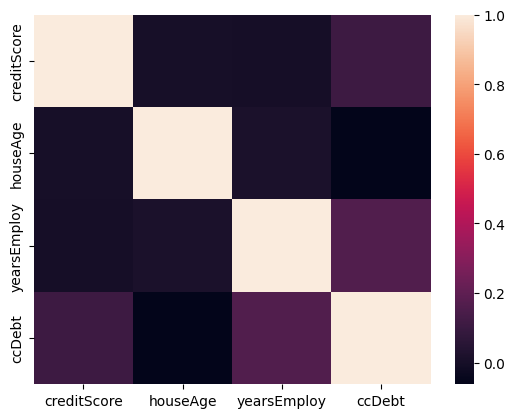

In [42]:
import seaborn as sns
sns.heatmap( data1.corr() )

In [43]:
#data_1 regression
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler().fit( data1[ ["creditScore", "houseAge","yearsEmploy"]] )
scaled_1 = scaler_1.transform( data1[ ["creditScore", "houseAge","yearsEmploy"]] )
data_1_scaled = pd.DataFrame( scaled_1, columns = ["creditScore", "houseAge","yearsEmploy"] )

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( data_1_scaled.drop( "creditScore", axis=1), data_1_scaled.creditScore, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model_1 = LinearRegression().fit( X_train_1, y_train_1)
#model_1 = DecisionTreeRegressor().fit( X_train_1, y_train_1)
#model_1 = RandomForestRegressor(n_estimators=100).fit( X_train_1, y_train_1)
#model_1 = AdaBoostRegressor().fit( X_train_1, y_train_1)

model_1.score( X_train_1, y_train_1 )

pred_1 = model_1.predict( X_test_1)
print( "predicted: ", pred_1[0] * scaler_1.scale_[0] + scaler_1.mean_[0],  ", actual:", y_test_1* scaler_1.scale_[0] + scaler_1.mean_[0] )

from sklearn.metrics import mean_squared_error
print( mean_squared_error( pred_1, y_test_1 ) * scaler_1.scale_[0] + scaler_1.mean_[0] )

predicted:  688.8733972608829 , actual: 9193     616.0
5981     681.0
15608    752.0
2417     668.0
7183     703.0
         ...  
24520    676.0
5253     680.0
8481     757.0
3554     710.0
8545     700.0
Name: creditScore, Length: 4949, dtype: float64
739.9257918402327


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# 중요 변수를 추출하기 위해서 statsmodels로 변수들의 P-value를 확인한다.
import statsmodels.api as sm

X = sm.add_constant(X_train_1)
y = y_train_1

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
results.pvalues

                            OLS Regression Results                            
Dep. Variable:            creditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2179
Date:                Thu, 14 Sep 2023   Prob (F-statistic):              0.804
Time:                        22:16:49   Log-Likelihood:                -28012.
No. Observations:               19792   AIC:                         5.603e+04
Df Residuals:                   19789   BIC:                         5.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0008      0.007      0.109      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


const          0.913503
houseAge       0.871237
yearsEmploy    0.520313
dtype: float64

# 실습 3
회사에서 새롭게 런칭한 디지털 콘텐츠 상품을 고객들을 대상으로 판매하는 방안을 데이터를 바탕으로 수립하고자 합니다.
구체적으로는,
 - 1) 고객들의 온라인 리뷰 데이터를 바탕으로 적절한 고객群을 발견하여 고객들에 대한 이해를 하고,
 - 2) 고객들이 생성했던 제품 구매 Transaction자료를 바탕으로 판매 패턴을 발견합니다.
 - 3) 프로모션 후 생성된 텍스트 데이터를 바탕으로 제품 판매 활동에 대한 평가를 하고자 합니다.


<대상 데이터>
 - 온라인 리뷰 데이터: data_1_2.csv
 - 제품 구매 이력 데이터: data_3.csv
 - 고객 피드백 데이터: data_5_2.csv


온라인 리뷰 데이터의 1~5번 변수에 대하여, K-means 클러스터링을 통해 고객 군집을 발견하세요. 이때 데이터 크기를 최소-최대 정규화를 적용하여 클러스터링하세요. 반복문을 사용하시어, K가 2,4,6,8일때의 Between Sum of Squares(모형의 inertia)를 비교해보세요. 그리고 k=8에서의 각 군집의 특성을 파악해보세요

In [45]:
import pandas as pd
data2 = pd.read_csv("data_1_2.csv")
#data2.info()
data2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ufb,usefulness,experience,numofrv,lenrv,dup,score
count,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000
mean,10.488322,0.709149,121.314850,1.866840,748.635313,0.240936,1092.860390
std,35.169500,0.323994,381.630728,4.635559,688.968540,0.427663,1956.667624
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.500000,0.000000,1.000000,347.000000,0.000000,78.000000
50%,4.000000,0.818182,0.000000,1.000000,564.000000,0.000000,326.000000
75%,9.000000,1.000000,0.000000,1.000000,921.000000,0.000000,1230.000000
max,2088.000000,1.000000,3130.000000,322.000000,17841.000000,1.000000,32507.000000


In [46]:
data2.drop(["dup", "score", "ufb"], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform( data2 )
data2_scaled = pd.DataFrame( scaled, columns = data2.columns)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
from sklearn.cluster import KMeans

for i in [2,4,6,8,10, 12]:
  print(i)
  print( KMeans(n_clusters=i).fit( data2_scaled).inertia_)

cluster = KMeans(n_clusters=8).fit( data2_scaled)
pd.DataFrame( cluster.cluster_centers_, columns = data2.columns)

2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



800.717421975505
4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


300.86169657053546
6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


177.59832224637935
8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


130.49280813945418
10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


103.69175732036612
12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


88.55899936919361


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,usefulness,experience,numofrv,lenrv
0,0.986318,0.005227,0.000739,0.043061
1,0.515570,0.012341,0.002109,0.040139
2,0.018145,0.003933,0.000412,0.031171
3,0.861570,0.287692,0.015219,0.051641
4,0.751486,0.012089,0.002378,0.045415
5,0.468737,0.411910,0.016288,0.044120
6,0.821212,0.640686,0.031659,0.050182
7,0.282550,0.011385,0.001324,0.036853


#실습 4

제품 구매이력 데이터로 부터, 기존 제품의 판매 패턴을 mlxtend 모듈을 사용해서 발견해보세요. 최소 지지도는 0.01이상이며, 그 외의 지표는 상황에 맞게 설정하세요

- 1행 부터 20000행까지 사용해보세요
- fpgrowth를 사용해보세요

In [49]:
!pip install -U mlxtend

import mlxtend
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
import mlxtend
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
import pandas as pd

df = pd.read_csv('data_3.csv')
df.shape
df = df.iloc[   0:10000 ,   :]  #10000행까지로 제한

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df['artist'] = df['artist'].str.strip()#앞뒤 공백 제거
df.dropna(axis=0, subset=['user'], inplace=True)
df['user'] = df['user'].astype('str')		#문자열로 변환

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_tmp = df.groupby('user')['artist'].apply(set).apply(list).to_list()
print(df_tmp[:10])

[['judas priest', 'the black dahlia murder', 'schandmaul', 'the rolling stones', 'the who', 'le tigre', 'rob zombie', 'edguy', 'the killers', 'eluveitie', 'red hot chili peppers', 'goldfrapp', 'john mayer', 'guano apes', 'jack johnson', 'dropkick murphys'], ['system of a down', 'the offspring', 'judas priest', 'the clash', 'neil young', 'metallica', 'slipknot', 'bob dylan', 'turbonegro', 'misfits', 'u2', 'ramones', 'håkan hellström', 'pink floyd', 'the beatles'], ['bad brains', 'minor threat', 'foo fighters', 'ac/dc', 'the hives', 'turbonegro', 'the smiths', 'jimmy eat world', 'slowdive'], ['maroon 5', 'john legend', 'james morrison', 'craig david', 'rihanna', 'stevie wonder', '50 cent', 'lil wayne', 'chamillionaire', 't.i.', 'alicia keys', 'usher', 'chris brown', 'ne-yo', 'john mayer', 'mariah carey', 'akon', 'gavin degraw'], ['2pac', 'moonspell', 'mobb deep', 'soulfly', 'pendulum', 'pet shop boys', 'nickelback', 'green day', 'eminem', 'sepultura', 'dmx', 'deathstars'], ['2pac', 'wu-t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
#df.head()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
frequent_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

tmp = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
tmp
tmp.sort_values(by = ['confidence', 'lift', 'support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(coldplay),(radiohead),0.146771,0.172211,0.058708,0.400000,2.322727,0.033433,1.379648,0.667431
2,(radiohead),(coldplay),0.172211,0.146771,0.058708,0.340909,2.322727,0.033433,1.294554,0.687943
0,(radiohead),(the beatles),0.172211,0.185910,0.054795,0.318182,1.711483,0.022779,1.193999,0.502195
1,(the beatles),(radiohead),0.185910,0.172211,0.054795,0.294737,1.711483,0.022779,1.173730,0.510646


# 실습5

고객 피드백을 통해 판촉에 대한 긍부정에 대한 데이터가 텍스트로 기록되어 있습니다. 텍스트마이닝을 거쳐, 중빈도(10~30)에 해당하는 단어들로 구성된 DTM이 data_5_2.csv 로 제공됩니다. 해당 파일의 첫 컬럼은 고객의 피드백이 긍정(1)인지 부정(0)인지 기록되어 있습니다. 이 데이터에서 긍정인 경우에 대한 피드백 단어들의 클러스터링을, 부정인 피드백에 대한 피드백 단어들의 발생패턴을 수행해보세요.


In [12]:
import pandas as pd
data4 = pd.read_csv("data/data_5_2.csv")
data4.columns
data4_1 = data4[ data4.iloc[:,0]==1 ]
data4_0 = data4[ data4.iloc[:,0]==0 ]

In [13]:
data4.shape

(100, 58)

In [14]:
#Kmeans
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform( data4_1)
scaled_df = pd.DataFrame( scaled, columns = data4_1.columns)
scaled_df.drop( "Unnamed: 0", axis=1, inplace=True)

In [15]:
from sklearn.cluster import KMeans
km = KMeans().fit(scaled_df)
pd.DataFrame( km.cluster_centers_, columns=scaled_df.columns).iloc[:, 0:11]
#topic modeling:LDA, BERTopic, ......

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,great,ask,card,give,love,problem,purchas,return,back,buy,good
0,-5.551115e-17,2.298851e-02,-1.387779e-17,0.034483,5.551115e-17,5.172414e-02,6.896552e-02,4.310345e-02,2.298851e-02,0.103448,1.379310e-01
1,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,5.000000e-01,0.000000e+00,5.000000e-01,0.000000e+00,6.666667e-01,0.000000,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00
3,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,6.938894e-18,1.666667e-01,6.938894e-18,-6.938894e-18,0.000000,8.333333e-02
4,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00
5,0.000000e+00,9.523810e-02,3.571429e-02,0.142857,0.000000e+00,6.938894e-18,1.387779e-17,3.571429e-02,4.761905e-02,0.142857,1.387779e-17
6,0.000000e+00,-6.938894e-18,1.875000e-01,0.000000,4.375000e-01,6.938894e-18,3.125000e-02,3.125000e-02,-1.387779e-17,0.250000,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,7.500000e-01,0.000000e+00,3.333333e-01,0.500000,1.000000e+00


In [16]:
data4_0.drop( "Unnamed: 0", axis=1, inplace=True)

/var/folders/bx/zv234tzj43l4hqdbys0hclvw0000gn/T/ipykernel_41567/1653755696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4_0.drop( "Unnamed: 0", axis=1, inplace=True)


In [60]:
#pattern
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
data4_0_bin = data4_0.applymap(encode_units)
df = pd.DataFrame(data4_0_bin, columns=data4_0.columns)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,great,ask,card,give,love,problem,purchas,return,back,buy,...,price,address,compani,find,kohl,target,deliv,pick,deliveri,sear
1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

tmp = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
tmp.sort_values(by = ['confidence', 'lift', 'support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
234,"(card, check)","(back, account)",0.065217,0.065217,0.065217,1.000000,15.333333,0.060964,inf,1.000000
235,"(card, back)","(check, account)",0.065217,0.065217,0.065217,1.000000,15.333333,0.060964,inf,1.000000
238,"(check, account)","(card, back)",0.065217,0.065217,0.065217,1.000000,15.333333,0.060964,inf,1.000000
239,"(back, account)","(card, check)",0.065217,0.065217,0.065217,1.000000,15.333333,0.060964,inf,1.000000
248,"(card, bank)","(back, check)",0.065217,0.065217,0.065217,1.000000,15.333333,0.060964,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
10,(card),(back),0.195652,0.195652,0.065217,0.333333,1.703704,0.026938,1.206522,0.513514
11,(back),(card),0.195652,0.195652,0.065217,0.333333,1.703704,0.026938,1.206522,0.513514
2,(great),(problem),0.260870,0.130435,0.065217,0.250000,1.916667,0.031191,1.159420,0.647059
4,(great),(return),0.260870,0.130435,0.065217,0.250000,1.916667,0.031191,1.159420,0.647059


# 실습 6

2008.csv는 2008년 미국내 항공 기록입니다. 이 데이터를 이용해서 미국 국내 항공 네트워크를 만들고 네트워크 분석을 해보세요

In [65]:
!unzip 2008.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  2008.zip
  inflating: 2008.csv                


In [66]:
import pandas as pd
import networkx as nx
df = pd.read_csv("2008.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [68]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2389217, 29)

In [69]:
edges = df[ ["Origin", "Dest"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
G = nx.from_pandas_edgelist(edges, source='Origin', target='Dest')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
print(G)

Graph with 293 nodes and 2605 edges


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
print('density:', nx.density(G))
print('transitivity:', nx.transitivity(G))
print('reciprocity:', nx.reciprocity(G))

density: 0.060895787554350364
transitivity: 0.38268412767525206
reciprocity: 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
deg = nx.degree(G)
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

partition = cl.best_partition(G)
pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'community.community_louvain'

In [75]:
print(G)

Graph with 293 nodes and 2605 edges


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [77]:
df.groupby("Origin")["DepDelay"].mean()
df.groupby("Dest")["ArrDelay"].mean()
deg = nx.degree(G)
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
tmp = df.groupby("Origin")["DepDelay"].mean()
tmp2 = df.groupby("Dest")["ArrDelay"].mean()
tmp3 = pd.merge(tmp, tmp2, left_index=True, right_index=True )
tmp3["id"] = tmp3.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
tmp3 = pd.merge( tmp3, pd.DataFrame( deg, columns = ["id", "deg"]), on="id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
tmp4 = pd.merge( tmp3, pd.DataFrame( {'id':bet_cen.keys(), "bet": bet_cen.values() }), on="id")
tmp4 = pd.merge( tmp4, pd.DataFrame( {'id':clo_cen.keys(), "clo": clo_cen.values() }), on="id")
tmp4 = pd.merge( tmp4, pd.DataFrame( {'id':eig_cen.keys(), "eig": eig_cen.values() }), on="id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
tmp4.index = tmp4.id
tmp4.drop("id", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
tmp4.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DepDelay,ArrDelay,deg,bet,clo,eig
DepDelay,1.000000,0.698518,0.138971,0.071096,0.197176,0.164061
ArrDelay,0.698518,1.000000,0.014011,0.001108,0.095881,0.032331
deg,0.138971,0.014011,1.000000,0.764048,0.867786,0.957892
bet,0.071096,0.001108,0.764048,1.000000,0.556813,0.584850
clo,0.197176,0.095881,0.867786,0.556813,1.000000,0.919837
eig,0.164061,0.032331,0.957892,0.584850,0.919837,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
